In [0]:
!pip install Pillow==4.1.1
!pip install "fastai==0.7.0"
!pip install torchtext==0.2.3
from os import path

In [3]:
!wget http://files.fast.ai/part2/lesson14/rossmann.tgz

--2019-01-08 09:40:41--  http://files.fast.ai/part2/lesson14/rossmann.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7730448 (7.4M) [text/plain]
Saving to: ‘rossmann.tgz’

rossmann.tgz        100%[===================>]   7.37M  11.2MB/s    in 0.7s    

2019-01-08 09:40:42 (11.2 MB/s) - ‘rossmann.tgz’ saved [7730448/7730448]



In [4]:
!mkdir rossman/
!tar -xvzf rossmann.tgz -C rossman

googletrend.csv
sample_submission.csv
state_names.csv
store.csv
store_states.csv
test.csv
train.csv
weather.csv


In [0]:
from fastai.structured import *
from fastai.column_data import *
import feather
np.set_printoptions(threshold=50, edgeitems=20)

PATH='rossman/'

In [0]:
def concat_csvs(dirname):
    path = f'{PATH}{dirname}'
    filenames=glob(f"{PATH}/*.csv")

    wrote_header = False
    with open(f"{path}.csv","w") as outputfile:
        for filename in filenames:
            name = filename.split(".")[0]
            with open(filename) as f:
                line = f.readline()
                if not wrote_header:
                    wrote_header = True
                    outputfile.write("file,"+line)
                for line in f:
                     outputfile.write(name + "," + line)
                outputfile.write("\n")  

In [0]:
# concat_csvs('googletrend')
# concat_csvs('weather')

In [0]:
table_names = ['train', 'store', 'store_states', 'state_names', 
               'googletrend', 'weather', 'test']

In [0]:
# load all our csv as df in list tables
tables = [pd.read_csv(f'{PATH}{fname}.csv', low_memory =False) for fname in table_names]

In [0]:
from IPython.display import HTML, display

In [11]:
for t in tables: display(t.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [0]:
# store tables into their respective tables from list
train, store, store_states, state_names, googletrend, weather, test = tables

In [0]:
train.StateHoliday = train.StateHoliday!='0' # convert state holiday into binary for easier execution
test.StateHoliday = test.StateHoliday!='0'

In [0]:
def join_df(left,right,left_on,right_on = None,suffix ='_y'):
  if right_on is None: right_on = left_on
  return left.merge(right,how = 'left',left_on =left_on,right_on = right_on,suffixes = ("",suffix))
  ##
  # doing left merge with suffixes on duplicates, only on right table _y

In [0]:
weather = join_df(weather,state_names,"file","StateName")

In [0]:
# add Date column to googletrends colm just declaring also adds it
googletrend['Date'] = googletrend.week.str.split(' - ', expand=True)[0]
googletrend['State'] = googletrend.file.str.split('_', expand=True)[2]
googletrend.loc[googletrend.State=='NI', "State"] = 'HB,NI'   # selecting row with name ni and colm state


In [0]:
# now deconstructing dates 
add_datepart(weather,"Date",drop =False)
add_datepart(googletrend, "Date", drop=False)
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)

In [0]:
# The Google trends data has a special category for the whole of Germany - we'll pull that out so we can use it explicitly.
trend_de = googletrend[googletrend.file=='Rossman_DE']

In [19]:
# we will now do outer join of all our data in single df
# outer join because if there is some data missing then we can find it after outer join and null search 
# whereas in inner join keeping track of before and after rows is hard

store = join_df(store,store_states,"Store")
len(store[store.State.isnull()])


0

In [20]:
joined = join_df(train, store, "Store")
joined_test = join_df(test, store, "Store")
len(joined[joined.StoreType.isnull()]),len(joined_test[joined_test.StoreType.isnull()])

(0, 0)

In [21]:
joined = join_df(joined, googletrend, ["State","Year", "Week"])
joined_test = join_df(joined_test, googletrend, ["State","Year", "Week"])
len(joined[joined.trend.isnull()]),len(joined_test[joined_test.trend.isnull()])

(0, 0)

In [22]:
joined = joined.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
joined_test = joined_test.merge(trend_de, 'left', ["Year", "Week"], suffixes=('', '_DE'))
len(joined[joined.trend_DE.isnull()]),len(joined_test[joined_test.trend_DE.isnull()])

(1017209, 41088)

In [23]:
joined = join_df(joined, weather, ["State","Date"])
joined_test = join_df(joined_test, weather, ["State","Date"])
len(joined[joined.Mean_TemperatureC.isnull()]),len(joined_test[joined_test.Mean_TemperatureC.isnull()])

(0, 0)

In [0]:
for df in (joined, joined_test):
    for c in df.columns:
        if c.endswith('_y'):
            if c in df.columns: df.drop(c, inplace=True, axis=1)

In [0]:
for df in (joined,joined_test):
    df['CompetitionOpenSinceYear'] = df.CompetitionOpenSinceYear.fillna(1900).astype(np.int32)
    df['CompetitionOpenSinceMonth'] = df.CompetitionOpenSinceMonth.fillna(1).astype(np.int32)
    df['Promo2SinceYear'] = df.Promo2SinceYear.fillna(1900).astype(np.int32)
    df['Promo2SinceWeek'] = df.Promo2SinceWeek.fillna(1).astype(np.int32)

In [0]:
for df in (joined,joined_test):
    df["CompetitionOpenSince"] = pd.to_datetime(dict(year=df.CompetitionOpenSinceYear, 
                                                     month=df.CompetitionOpenSinceMonth, day=15))
    df["CompetitionDaysOpen"] = df.Date.subtract(df.CompetitionOpenSince).dt.days

In [0]:
# remove erroneous data 
for df in (joined,joined_test):
    df.loc[df.CompetitionDaysOpen<0, "CompetitionDaysOpen"] = 0
    df.loc[df.CompetitionOpenSinceYear<1990, "CompetitionDaysOpen"] = 0

In [28]:
# We add "CompetitionMonthsOpen" field, limiting the maximum to 2 years to limit number of unique categories.

for df in (joined,joined_test):
    df["CompetitionMonthsOpen"] = df["CompetitionDaysOpen"]//30
    df.loc[df.CompetitionMonthsOpen>24, "CompetitionMonthsOpen"] = 24
joined.CompetitionMonthsOpen.unique() 

array([24,  3, 19,  9,  0, 16, 17,  7, 15, 22, 11, 13,  2, 23, 12,  4, 10,  1, 14, 20,  8, 18,  6, 21,  5])

In [0]:
# same for promo dates
for df in (joined,joined_test):
    df["Promo2Since"] = pd.to_datetime(df.apply(lambda x: Week(
        x.Promo2SinceYear, x.Promo2SinceWeek).monday(), axis=1).astype(pd.datetime))
    df["Promo2Days"] = df.Date.subtract(df["Promo2Since"]).dt.days

In [0]:
for df in (joined,joined_test):
    df.loc[df.Promo2Days<0, "Promo2Days"] = 0
    df.loc[df.Promo2SinceYear<1990, "Promo2Days"] = 0
    df["Promo2Weeks"] = df["Promo2Days"]//7
    df.loc[df.Promo2Weeks<0, "Promo2Weeks"] = 0
    df.loc[df.Promo2Weeks>25, "Promo2Weeks"] = 25
    df.Promo2Weeks.unique()

In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

In [0]:
joined = feather.read_dataframe(f'{PATH}joined')
joined_test = feather.read_dataframe(f'{PATH}joined_test')

In [33]:
joined.head().T.head(40)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CloudCover,Events,WindDirDegrees,StateName,CompetitionOpenSince,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Since,Promo2Days,Promo2Weeks
0,1,5,2015-07-31,5263,555,1,1,False,1,2015,...,1.0,Fog,13,Hessen,2008-09-15,2510,24,1900-01-01,0,0
1,2,5,2015-07-31,6064,625,1,1,False,1,2015,...,4.0,Fog,309,Thueringen,2007-11-15,2815,24,2010-03-29,1950,25
2,3,5,2015-07-31,8314,821,1,1,False,1,2015,...,2.0,Fog,354,NordrheinWestfalen,2006-12-15,3150,24,2011-04-04,1579,25
3,4,5,2015-07-31,13995,1498,1,1,False,1,2015,...,6.0,None,282,Berlin,2009-09-15,2145,24,1900-01-01,0,0
4,5,5,2015-07-31,4822,559,1,1,False,1,2015,...,4.0,None,290,Sachsen,2015-04-15,107,3,1900-01-01,0,0


In [0]:
## find no of times a thing elapsed, it resets to 0 once whole thing reappears

def get_elapsed(fld, pre):
    day1 = np.timedelta64(1, 'D')
    last_date = np.datetime64()
    last_store = 0
    res = []

    for s,v,d in zip(df.Store.values,df[fld].values, df.Date.values):
        if s != last_store:
            last_date = np.datetime64()
            last_store = s
        if v: last_date = d
        res.append(((d-last_date).astype('timedelta64[D]') / day1))
    df[pre+fld] = res

In [0]:
columns = ["Date", "Store", "Promo", "StateHoliday", "SchoolHoliday"]

In [0]:
df = train[columns].append(test[columns])

In [0]:
fld = 'SchoolHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'StateHoliday'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
fld = 'Promo'
df = df.sort_values(['Store', 'Date'])
get_elapsed(fld, 'After')
df = df.sort_values(['Store', 'Date'], ascending=[True, False])
get_elapsed(fld, 'Before')

In [0]:
df = df.set_index("Date")

In [0]:
columns = ['SchoolHoliday', 'StateHoliday', 'Promo']

In [0]:
for o in ['Before', 'After']:
    for p in columns:
        a = o+p
        df[a] = df[a].fillna(0).astype(int)

In [0]:
## sorting by date (sort_index()) and counting the number of events of interest (sum()) defined in columns 
## in the following week (rolling()), grouped by Store (groupby()). We do the same in the opposite direction.

bwd = df[['Store']+columns].sort_index().groupby("Store").rolling(7, min_periods=1).sum()

fwd = df[['Store']+columns].sort_index(ascending=False
                                      ).groupby("Store").rolling(7, min_periods=1).sum()
  

In [0]:
# Next we want to drop the Store indices grouped together in the window function. Often in pandas, 
# there is an option to do this in place. This is time and memory efficient when working with large datasets.

bwd.drop('Store',1,inplace=True)
bwd.reset_index(inplace=True)

fwd.drop('Store',1,inplace=True)
fwd.reset_index(inplace=True)


In [0]:
df.reset_index(inplace=True)

In [0]:
df = df.merge(bwd, 'left', ['Date', 'Store'], suffixes=['', '_bw'])
df = df.merge(fwd, 'left', ['Date', 'Store'], suffixes=['', '_fw'])

In [0]:
df.drop(columns,1,inplace=True)

In [49]:
df.head()

,Date,Store,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_fw,Promo_fw
0,2015-09-17,1,13,0,105,0,0,0,0.0,0.0,4.0,0.0,0.0,1.0
1,2015-09-16,1,12,0,104,0,0,0,0.0,0.0,3.0,0.0,0.0,2.0
2,2015-09-15,1,11,0,103,0,0,0,0.0,0.0,2.0,0.0,0.0,3.0
3,2015-09-14,1,10,0,102,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
4,2015-09-13,1,9,0,101,0,9,-1,0.0,0.0,0.0,0.0,0.0,4.0


In [0]:
# save
df.to_feather(f'{PATH}df')

In [0]:
df["Date"] = pd.to_datetime(df.Date)

In [55]:
df.columns

Index(['Date', 'Store', 'AfterSchoolHoliday', 'BeforeSchoolHoliday',
       'AfterStateHoliday', 'BeforeStateHoliday', 'AfterPromo', 'BeforePromo',
       'SchoolHoliday_bw', 'StateHoliday_bw', 'Promo_bw', 'SchoolHoliday_fw',
       'StateHoliday_fw', 'Promo_fw'],
      dtype='object')

In [0]:
joined = join_df(joined, df, ['Store', 'Date'])

In [0]:
joined_test = join_df(joined_test, df, ['Store', 'Date'])

In [0]:
# they[op] removed 0 sales where store was closed so it might help in future as there was apparent spikes in sales
# as obvious 
joined = joined[joined.Sales!=0]

In [0]:
joined.reset_index(inplace=True)
joined_test.reset_index(inplace=True)

In [0]:
joined.to_feather(f'{PATH}joined')
joined_test.to_feather(f'{PATH}joined_test')

## feature engineering done

In [61]:
joined.head().T.head(40)

,0,1,2,3,4
level_0,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False


In [62]:
## we need to convert to input compatible with a neural network. This includes converting categorical variables 
## into contiguous integers or one-hot encodings, normalizing continuous features to standard normal, etc...

cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

contin_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

n = len(joined); n

844338

In [0]:
dep = 'Sales'
joined = joined[cat_vars+contin_vars+[dep, 'Date']].copy()

In [0]:
joined_test[dep] = 0
joined_test = joined_test[cat_vars+contin_vars+[dep, 'Date', 'Id']].copy()

In [0]:
# convert into categorical variables 
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()

In [0]:
# Transform any string columns in categorical variables using joined as a template
# categorical variables are made for validation
apply_cats(joined_test, joined)

In [0]:
# Now we will transform the continuous variable columns.
# These are transformed to float32 because this is the type expected by PyTorch
for variable in contin_vars:
    joined[variable] = joined[variable].astype('float32')
    joined_test[variable] = joined_test[variable].astype('float32')

In [70]:
# We're going to create some sample data to run on
joined_size = len(joined)

indices = get_cv_idxs(joined_size, val_pct=150000/joined_size)
joined_sample = joined.iloc[indices].set_index('Date')

sample_size = len(joined_sample)
sample_size

150000

In [0]:
# We need to do a quick data fix
joined_sample['AfterStateHoliday']=joined_sample['AfterStateHoliday'].fillna(0)
joined_sample['BeforeStateHoliday']=joined_sample['BeforeStateHoliday'].fillna(0)

In [74]:
# Now we set up our data by processing our dataframe
# joined_sample is passed in, and we get df (dataframe) out
# But this dataframe has the dependent variable -- Sales -- removed
# Neural nets like input data to be aruond 0 with standard deviation of 1. do_scale=True sets this up
# nas sets na values to 0s or a median value for continuous data keeps record of missing values 
# mapper stores the results from do_scale so the same scaling can be applied to the test set

df, dependent_variable, nas, mapper = proc_df(joined_sample, 'Sales', do_scale=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count


In [0]:
# This is to make the evaluation metric easier
yl = np.log(dependent_variable)

In [0]:
# Set up our test data in the same way
joined_test = joined_test.set_index("Date")
df_test, _, nas, mapper = proc_df(joined_test, 'Sales', do_scale=True, skip_flds=['Id'],
                                  mapper=mapper, na_dict=nas)

In [0]:
# Take the last 25% of rows sorted by date as the cross-validation data
# (In time-series, we don't want to just take random rows, as discussed above)
training_ratio = 0.75
training_size = int(sample_size * training_ratio)
validation_indexes = list(range(training_size, len(df)))

In [0]:
val_idx = np.flatnonzero(
    (df.index<=datetime.datetime(2014,9,17)) & (df.index>=datetime.datetime(2014,8,1)))

In [0]:
val_idx=[0]

In [0]:
# Define the root mean squared percent error function
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [0]:
# setting up model data
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test)

In [0]:
# Now we set up the size of our encoding matrices
# First, we want to get the size of each of categories, and add +1 to account for the 'Unknown' category
category_sizes = [(category, len(joined_sample[category].cat.categories)+1) for category in cat_vars]

In [90]:
category_sizes


[('Store', 1116),
 ('DayOfWeek', 8),
 ('Year', 4),
 ('Month', 13),
 ('Day', 32),
 ('StateHoliday', 3),
 ('CompetitionMonthsOpen', 26),
 ('Promo2Weeks', 27),
 ('StoreType', 5),
 ('Assortment', 4),
 ('PromoInterval', 4),
 ('CompetitionOpenSinceYear', 24),
 ('Promo2SinceYear', 9),
 ('State', 13),
 ('Week', 53),
 ('Events', 22),
 ('Promo_fw', 7),
 ('Promo_bw', 7),
 ('StateHoliday_fw', 4),
 ('StateHoliday_bw', 4),
 ('SchoolHoliday_fw', 9),
 ('SchoolHoliday_bw', 9)]

In [0]:
# Then we use the number of categories/2, with a cap of 50 to set the encoding matrix size
# (This is a heuristic)
embedding_sizes = [(category, min(50, (category+1)//2)) for _, category in category_sizes]

In [92]:
embedding_sizes

[(1116, 50),
 (8, 4),
 (4, 2),
 (13, 7),
 (32, 16),
 (3, 2),
 (26, 13),
 (27, 14),
 (5, 3),
 (4, 2),
 (4, 2),
 (24, 12),
 (9, 5),
 (13, 7),
 (53, 27),
 (22, 11),
 (7, 4),
 (7, 4),
 (4, 2),
 (4, 2),
 (9, 5),
 (9, 5)]

In [0]:
###### running on a sample
# Now we'll find the learning rate
# len(df.columns)-len(categorical_variables) = get the number of continuous variables
# 0.04 = dropout
# [1000, 500] = number of activations in each layer
# [0.001, 0.01] = dropout in later layers 1st linear and 2nd linear

m = md.get_learner(embedding_sizes, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [96]:
# will stop whem finds optimum value
m.lr_find()


epoch      trn_loss   val_loss   
    0      0.192789   0.018154  



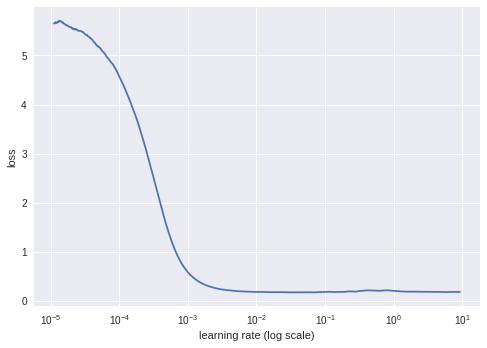

In [97]:
m.sched.plot()

In [98]:
# Now we'll do our learning like usual
# Note we can pass in whatever metric we want. This will just be printed out after each epoch.
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.183228   0.009021   0.099636  
    1      0.180767   0.00407    0.065872  
    2      0.18346    0.007234   0.088774  



[array([0.00723]), 0.0887742185037103]

In [99]:
m.fit(lr, 5, metrics=[exp_rmspe], cycle_len=1)


    1      0.18314    0.005372   0.076049  
    2      0.184793   0.004813   0.071841  
    3      0.180365   0.00464    0.070489  
    4      0.179791   0.004944   0.072846  



[array([0.00494]), 0.07284648816229079]

In [100]:
m.fit(lr, 2, metrics=[exp_rmspe], cycle_len=4)


epoch      trn_loss   val_loss   exp_rmspe  
    0      0.183873   0.001868   0.044166  
    1      0.180405   0.003277   0.058915  
    2      0.184782   0.007936   0.093172  
    3      0.176015   0.004831   0.071976  
    4      0.184852   0.001264   0.036198  
    5      0.1827     0.00816    0.094541  
    6      0.18563    0.003494   0.060888  
    7      0.185735   0.005263   0.075246  



[array([0.00526]), 0.07524642198236858]

In [0]:
## fitting on all data
m = md.get_learner(embedding_sizes, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [103]:
m.fit(lr, 1, metrics=[exp_rmspe])


epoch      trn_loss   val_loss   exp_rmspe  
    0      0.184559   0.007742   0.091973  



[array([0.00774]), 0.09197289250331953]

In [104]:
m.fit(lr, 3, metrics=[exp_rmspe])


epoch      trn_loss   val_loss   exp_rmspe  
    0      0.185952   0.006144   0.081534  
    1      0.179902   0.013363   0.122543  
    2      0.186679   0.002388   0.05008   



[array([0.00239]), 0.050079940801661095]

In [105]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.179499   0.005273   0.075319  
    1      0.18102    0.004632   0.070431  
    2      0.17789    0.004395   0.068539  



[array([0.00439]), 0.06853852298823825]

In [0]:
m = md.get_learner(embedding_sizes, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-3

In [108]:
m.fit(lr, 3, metrics=[exp_rmspe])


epoch      trn_loss   val_loss   exp_rmspe  
    0      0.182376   0.00278    0.05414   
    1      0.181865   0.002228   0.048339  
    2      0.181032   0.005215   0.074885  



[array([0.00521]), 0.07488453415835167]

In [109]:
m.fit(lr, 3, metrics=[exp_rmspe], cycle_len=1)

epoch      trn_loss   val_loss   exp_rmspe  
    0      0.179709   0.005181   0.074631  
    1      0.186194   0.00473    0.071196  
    2      0.181871   0.005535   0.077232  



[array([0.00553]), 0.07723246597664239]

In [0]:
m.save('val0')
# m.load('val0')


In [0]:
x,y=m.predict_with_targs()


In [112]:
exp_rmspe(x,y)

0.07723246597664239

In [0]:
pred_test=m.predict(True)

In [0]:
pred_test = np.exp(pred_test)

In [0]:
joined_test['Sales']=pred_test

In [0]:
csv_fn=f'{PATH}tmp/sub.csv'

In [0]:
joined_test[['Id','Sales']].to_csv(csv_fn, index=False)

In [0]:
# create a link to the submission file

### FileLink(csv_fn)
